In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

## Load losses and plot

In [2]:
def process_and_average_losses(losses_path, fnames):
    losses = []
    for fn in fnames:
        with open(losses_path+fn, "rb") as fp:
            losses.append(pickle.load(fp))

    processed_losses = []
    for f in range(len(fnames)):
        processed_losses.append(dict())
        for l in losses[f]:
            if l.startswith('mixture'):
                lname = 'mixture'
            else:
                lname = l
            processed_losses[f][lname] = losses[f][l]/losses[f][l][0]

    loss_avgs = dict()
    loss_stddevs = dict()
    for l in losses[f]:
        if l.startswith('mixture'):
            lname = 'mixture'
        else:
            lname = l
        loss_avgs[lname] = np.mean([processed_losses[f][lname] for f in range(len(fnames))], axis = 0)
        loss_stddevs[lname] = np.std([processed_losses[f][lname] for f in range(len(fnames))], axis = 0)
    return loss_avgs, loss_stddevs

# MNIST

In [3]:
losses_path = "./losses/"
# baseline losses
fnames = ["batch_0_20230523-033236.npz", 
            "batch_1_20230523-033459.npz", 
            "batch_2_20230523-033737.npz", 
            "batch_3_20230523-033959.npz",
            "batch_4_20230523-034216.npz",
            "batch_5_20230523-034436.npz",
            "batch_6_20230523-034653.npz",
            "batch_7_20230523-034919.npz",
            "batch_8_20230523-035156.npz",
            "batch_9_20230523-035549.npz"]

baseline_loss_avgs, baseline_loss_stddevs = process_and_average_losses(losses_path, fnames)

# regularized losses
fnames = ["ours_batch_0_20230523-051420.npz",
            "ours_batch_1_20230523-051630.npz",
            "ours_batch_2_20230523-051826.npz",
            "ours_batch_3_20230523-052022.npz",
            "ours_batch_4_20230523-052217.npz"]
our_loss_avgs, our_loss_stddevs = process_and_average_losses(losses_path, fnames)

all_loss_avgs = [baseline_loss_avgs, our_loss_avgs]
all_loss_stddevs = [baseline_loss_stddevs, our_loss_stddevs]
plot_labels = ['baseline', 'regularized']


In [4]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [5]:
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('axes', labelsize=20)     # fontsize of the axes title


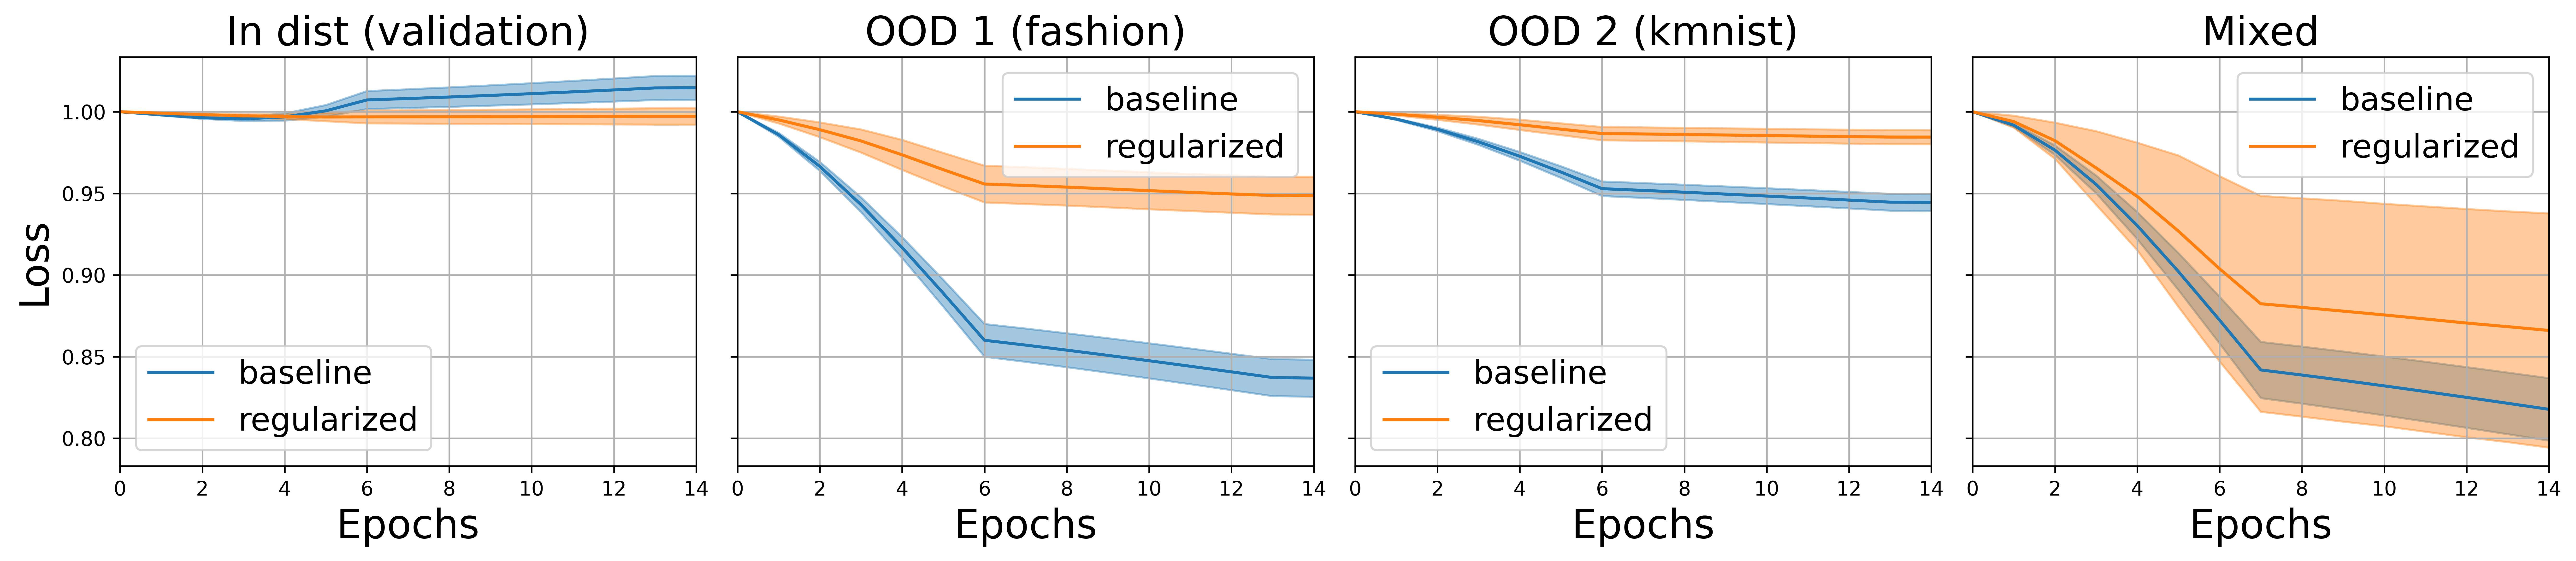

In [6]:
fig, axs = plt.subplots(1,len(all_loss_avgs[0]), figsize=(18,4), sharey=True, tight_layout=True, dpi = 600)

for f in range(len(all_loss_avgs)):
    for l in all_loss_avgs[f]:
        if l.startswith('mixture'):
            ttl = 'Mixed'
            ai = 3
        elif l.startswith('fashion'):
            ttl = 'OOD 1 (fashion)'
            ai = 1
        elif l.startswith('kmnist'):
            ttl = 'OOD 2 (kmnist)'
            ai = 2
        elif l.startswith('mnist_test'):
            ttl = 'In dist (validation)'
            ai = 0
        else:
            raise ValueError("Unknown l ",l)
        axs[ai].plot(all_loss_avgs[f][l], color=colors[f], label=plot_labels[f])
        axs[ai].fill_between(np.arange(len(all_loss_avgs[f][l])), all_loss_avgs[f][l] - all_loss_stddevs[f][l], all_loss_avgs[f][l] + all_loss_stddevs[f][l], color=colors[f], alpha=0.4)

    
        
        axs[ai].set_title(ttl)
        axs[ai].set(xlabel='Epochs')
        axs[ai].set_xlim([0.0, 14.0])
        
axs[0].set(ylabel='Loss')
for i in range(len(axs)):
    axs[i].grid()
    axs[i].legend()



# plt.savefig('LossEvolutionMNIST.png', dpi=600)

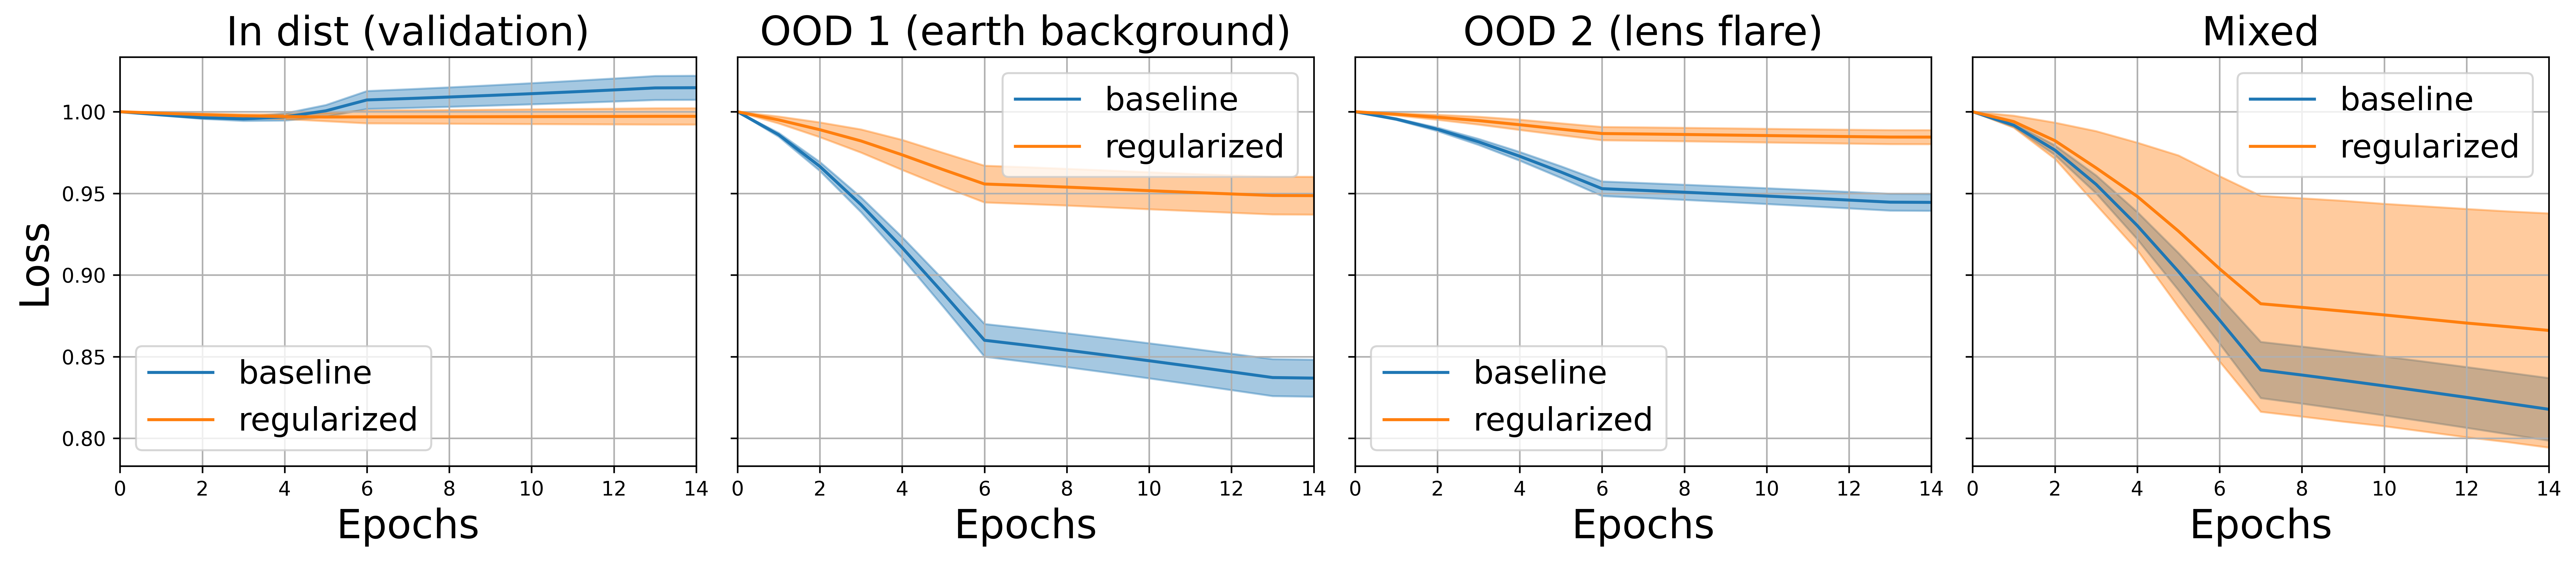

In [54]:
fig, axs = plt.subplots(1,len(all_loss_avgs[0]), figsize=(18,4), sharey=True, tight_layout=True, dpi = 600)
# fig.suptitle('Loss reduction across categories (MNIST)')

for f in range(len(all_loss_avgs)):
    for l in all_loss_avgs[f]:
        if l.startswith('mixture'):
            ttl = 'Mixed'
            ai = 3
        elif l.startswith('fashion'):
            ttl = 'OOD 1 (earth background)'
            ai = 1
        elif l.startswith('kmnist'):
            ttl = 'OOD 2 (lens flare)'
            ai = 2
        elif l.startswith('mnist_test'):
            ttl = 'In dist (validation)'
            ai = 0
        else:
            raise ValueError("Unknown l ",l)
        axs[ai].plot(all_loss_avgs[f][l], color=colors[f], label=plot_labels[f])
        axs[ai].fill_between(np.arange(len(all_loss_avgs[f][l])), all_loss_avgs[f][l] - all_loss_stddevs[f][l], all_loss_avgs[f][l] + all_loss_stddevs[f][l], color=colors[f], alpha=0.4)

    
        
        axs[ai].set_title(ttl)
        axs[ai].set(xlabel='Epochs')
        axs[ai].set_xlim([0.0, 14.0])
        
axs[0].set(ylabel='Loss')
for i in range(len(axs)):
    axs[i].grid()
    axs[i].legend()



# plt.savefig('LossEvolutionExoRomperTEMP.png', dpi=600)

# Exoromper

In [7]:
losses_path = "./losses/"
# baseline losses
# fnames = ["exo2_batch_0_20230525-043702.npz",
#             "exo2_batch_1_20230525-043917.npz",
#             "exo2_batch_2_20230525-044132.npz",
#             "exo2_batch_3_20230525-044352.npz",
#             "exo2_batch_4_20230525-044605.npz"]
# fnames = ["exo3_batch_0_20230525-044927.npz",
#             "exo3_batch_1_20230525-045141.npz",
#             "exo3_batch_2_20230525-045358.npz",
#             "exo3_batch_3_20230525-045720.npz"]
fnames = ["exo4_batch_0_20230525-044927.npz",
            "exo4_batch_1_20230525-045141.npz",
            "exo4_batch_2_20230525-045358.npz",
            "exo4_batch_3_20230525-045720.npz"]
baseline_loss_avgs, baseline_loss_stddevs = process_and_average_losses(losses_path, fnames)

# regularized losses
fnames = ["exo1_batch_0_20230525-042329.npz",
            "exo1_batch_1_20230525-042544.npz",
            "exo1_batch_2_20230525-042800.npz",
            "exo1_batch_3_20230525-043018.npz",
            "exo1_batch_4_20230525-043234.npz"]
our_loss_avgs, our_loss_stddevs = process_and_average_losses(losses_path, fnames)

all_loss_avgs = [baseline_loss_avgs, our_loss_avgs]
all_loss_stddevs = [baseline_loss_stddevs, our_loss_stddevs]
plot_labels = ['baseline', 'regularized']


In [8]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [9]:
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('axes', labelsize=20)     # fontsize of the axes title


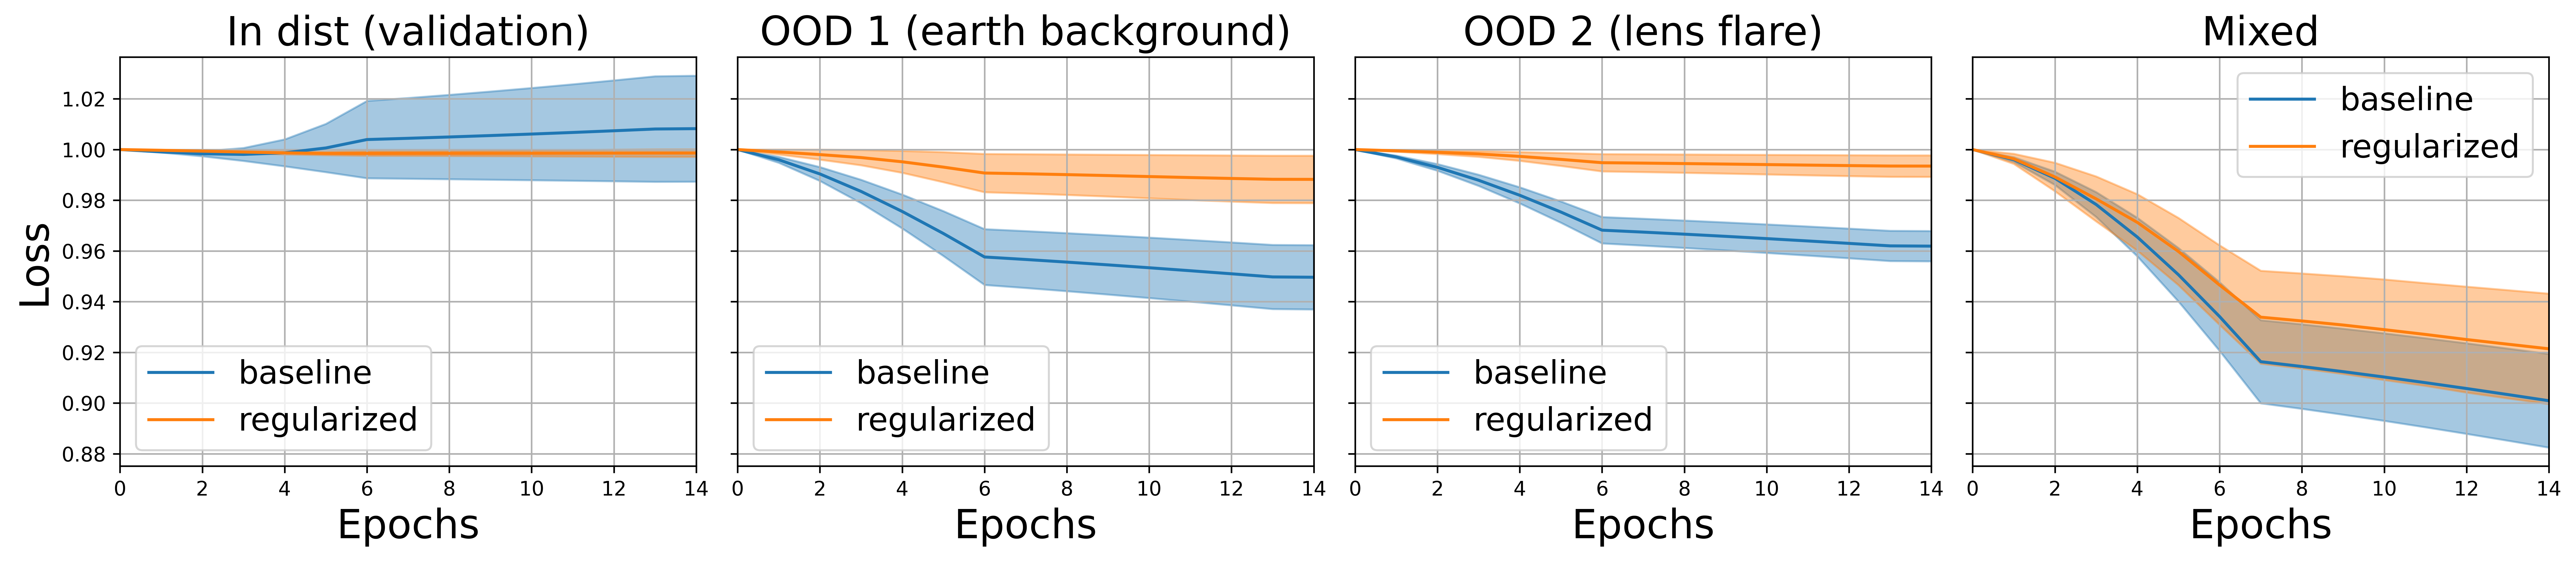

In [10]:
fig, axs = plt.subplots(1,len(all_loss_avgs[0]), figsize=(18,4), sharey=True, tight_layout=True, dpi = 600)

for f in range(len(all_loss_avgs)):
    for l in all_loss_avgs[f]:
        if l.startswith('mixture'):
            ttl = 'Mixed'
            ai = 3
        elif l.startswith('fashion') or l.startswith('earth'):
            ttl = 'OOD 1 (earth background)'
            ai = 1
        elif l.startswith('kmnist') or l.startswith('lens'):
            ttl = 'OOD 2 (lens flare)'
            ai = 2
        elif l.startswith('mnist_test') or l.startswith('space'):
            ttl = 'In dist (validation)'
            ai = 0
        else:
            raise ValueError("Unknown l ",l)
        axs[ai].plot(all_loss_avgs[f][l], color=colors[f], label=plot_labels[f])
        axs[ai].fill_between(np.arange(len(all_loss_avgs[f][l])), all_loss_avgs[f][l] - all_loss_stddevs[f][l], all_loss_avgs[f][l] + all_loss_stddevs[f][l], color=colors[f], alpha=0.4)

    
        
        axs[ai].set_title(ttl)
        axs[ai].set(xlabel='Epochs')
        axs[ai].set_xlim([0.0, 14.0])
        
axs[0].set(ylabel='Loss')
for i in range(len(axs)):
    axs[i].grid()
    axs[i].legend()



# plt.savefig('LossEvolutionExoRomper.png', dpi=600)